In [1]:
import os
import pandas as pd
import alpaca_trade_api as tradeapi
import numpy as np
import datetime
import pandas_datareader as pdr
from dotenv import load_dotenv

%matplotlib inline

In [2]:
import yfinance as yf

In [3]:
# Date Ranges for SP 500 and for all tickers
# Modify these date ranges each week.
# The below will pull back stock prices from the start date until end date specified.
start_sp = datetime.datetime(2013, 1, 1)
end_sp = datetime.datetime(2018, 3, 9)
# This variable is used for YTD performance.
end_of_last_year = datetime.datetime(2017, 12, 29)
# These are separate if for some reason want different date range than SP.
stocks_start = datetime.datetime(2013, 1, 1)
stocks_end = datetime.datetime(2018, 3, 9)

In [4]:
yf.pdr_override()

In [5]:
sp500 = pdr.get_data_yahoo('^GSPC', 
                           start_sp,
                             end_sp)
    
sp500.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-03-05,2728.090088,2675.750000,2681.060059,2720.939941,3710810000,2720.939941
2018-03-06,2732.080078,2711.260010,2730.179932,2728.120117,3370690000,2728.120117
2018-03-07,2730.600098,2701.739990,2710.179932,2726.800049,3393270000,2726.800049
2018-03-08,2740.449951,2722.649902,2732.750000,2738.969971,3212320000,2738.969971
2018-03-09,2786.570068,2751.540039,2752.909912,2786.570068,3364100000,2786.570068


In [6]:
tickers = ["SQ", "TSLA", "AAPL", "GOOG", "PYPL", "SHOP", "TDOC", "NVDA", "TWTR", "Z"]

start = '2016-01-01'
end = '2021-05-13'

In [7]:
df = pdr.data.get_data_yahoo(tickers, start, end)

[*********************100%***********************]  10 of 10 completed


In [8]:
df.tail()

Adj Close                                                    \
                  AAPL         GOOG        NVDA        PYPL         SHOP   
Date                                                                       
2021-05-06  129.520004  2381.350098  580.919983  252.020004  1090.930054   
2021-05-07  130.210007  2398.689941  592.489990  253.360001  1108.599976   
2021-05-10  126.849998  2341.659912  570.630005  243.630005  1080.239990   
2021-05-11  125.910004  2308.760010  572.250000  248.600006  1110.199951   
2021-05-12  122.769997  2239.080078  550.340027  239.910004  1083.900024   

                                                                       ...  \
                    SQ        TDOC        TSLA       TWTR           Z  ...   
Date                                                                   ...   
2021-05-06  223.960007  151.899994  663.539978  53.810001  113.750000  ...   
2021-05-07  233.350006  151.039993  672.369995  53.790001  118.544998  ...   
2021-05-10  216.429993  141.050003  629.039978  51.810001  112.470001  ...   
2021-05-11  220.649994  145.789993  617.200012  52.880001  114.779999  ...   
2021-05-12  206.669998  140.080002  589.890015  50.700001  108.720001  ...   

               Volume                                                          \
                 AAPL     GOOG     NVDA      PYPL     SHOP        SQ     TDOC   
Date                                                                            
2021-05-06   78128300  1030900  4834500  17998700  2240600  14759100  5164000   
2021-05-07   78892700  1163600  5730200  10164900  1558900  14820100  4505000   
2021-05-10   88071200  1300300  6722600   8909200  1390500  13256900  5684300   
2021-05-11  126142800  1605500  7139600   9258200  1924300  13676100  6350300   
2021-05-12  112172300  1746700  7585200   8649800  1386100  11778300  3425000   

                                         
                TSLA      TWTR        Z  
Date                                     
2021-05-06  27784600  19586900  5767300  
2021-05-07  23422100  21719200  4216400  
2021-05-10  31392400  17362300  3379900  
2021-05-11  46503900  16749900  4246400  
2021-05-12  33823600  17223200  4173900  

[5 rows x 60 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1349 entries, 2016-01-04 to 2021-05-12
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  1349 non-null   float64
 1   (Adj Close, GOOG)  1349 non-null   float64
 2   (Adj Close, NVDA)  1349 non-null   float64
 3   (Adj Close, PYPL)  1349 non-null   float64
 4   (Adj Close, SHOP)  1349 non-null   float64
 5   (Adj Close, SQ)    1349 non-null   float64
 6   (Adj Close, TDOC)  1349 non-null   float64
 7   (Adj Close, TSLA)  1349 non-null   float64
 8   (Adj Close, TWTR)  1349 non-null   float64
 9   (Adj Close, Z)     1349 non-null   float64
 10  (Close, AAPL)      1349 non-null   float64
 11  (Close, GOOG)      1349 non-null   float64
 12  (Close, NVDA)      1349 non-null   float64
 13  (Close, PYPL)      1349 non-null   float64
 14  (Close, SHOP)      1349 non-null   float64
 15  (Close, SQ)        1349 non-null   float64
 16  (Close

In [10]:
df.loc['2018-01']

Adj Close                                                  \
                 AAPL         GOOG        NVDA       PYPL        SHOP   
Date                                                                    
2018-01-02  41.310070  1065.000000  197.627533  73.839996  105.489998   
2018-01-03  41.302879  1082.479980  210.634125  76.750000  107.750000   
2018-01-04  41.494736  1086.400024  211.744446  76.730003  109.949997   
2018-01-05  41.967163  1102.229980  213.538834  78.699997  110.580002   
2018-01-08  41.811283  1106.939941  220.081818  79.050003  112.349998   
2018-01-09  41.806496  1106.260010  220.022339  79.190002  110.730003   
2018-01-10  41.796894  1102.609985  221.747299  79.370003  111.000000   
2018-01-11  42.034309  1105.520020  222.143845  79.750000  111.129997   
2018-01-12  42.468365  1122.260010  221.053345  80.540001  112.800003   
2018-01-16  42.252544  1121.760010  218.208130  80.419998  111.919998   
2018-01-17  42.950397  1131.979980  222.778305  82.470001  114.910004   
2018-01-18  42.988770  1129.790039  222.500702  82.940002  114.800003   
2018-01-19  42.796917  1137.510010  228.121704  83.839996  115.480003   
2018-01-22  42.446796  1155.810059  231.670822  83.980003  119.430000   
2018-01-23  42.456383  1169.969971  236.845673  84.209999  118.690002   
2018-01-24  41.780109  1164.239990  233.762558  83.709999  119.669998   
2018-01-25  41.034294  1170.369995  234.307800  84.339996  124.900002   
2018-01-26  41.130219  1175.839966  241.227524  85.449997  129.070007   
2018-01-29  40.278881  1175.579956  244.717087  84.309998  127.300003   
2018-01-30  40.041470  1163.689941  240.622772  83.779999  124.209999   
2018-01-31  40.151787  1169.939941  243.676147  85.320000  127.919998   

                                                                   ...  \
                   SQ       TDOC       TSLA       TWTR          Z  ...   
Date                                                               ...   
2018-01-02  36.169998  36.200001  64.106003  24.510000  42.480000  ...   
2018-01-03  37.310001  36.849998  63.450001  24.450001  42.970001  ...   
2018-01-04  38.099998  37.200001  62.924000  23.990000  42.130001  ...   
2018-01-05  41.139999  37.500000  63.316002  24.320000  42.610001  ...   
2018-01-08  40.759998  36.049999  67.281998  24.590000  42.759998  ...   
2018-01-09  40.880001  34.500000  66.737999  24.170000  42.169998  ...   
2018-01-10  40.840000  33.099998  66.959999  24.250000  42.500000  ...   
2018-01-11  42.299999  33.200001  67.589996  24.350000  44.529999  ...   
2018-01-12  41.250000  32.650002  67.244003  25.410000  44.529999  ...   
2018-01-16  39.320000  32.750000  68.012001  24.660000  44.400002  ...   
2018-01-17  40.060001  32.450001  69.431999  24.559999  44.540001  ...   
2018-01-18  40.270000  31.299999  68.914001  24.040001  43.970001  ...   
2018-01-19  42.560001  32.650002  70.003998  23.660000  42.580002  ...   
2018-01-22  45.290001  32.750000  70.311996  23.320000  42.930000  ...   
2018-01-23  45.009998  34.549999  70.557999  22.750000  43.720001  ...   
2018-01-24  44.320000  34.900002  69.178001  22.370001  43.720001  ...   
2018-01-25  45.119999  35.299999  67.528000  22.160000  44.200001  ...   
2018-01-26  45.970001  36.500000  68.570000  24.270000  46.040001  ...   
2018-01-29  45.430000  36.099998  69.905998  25.180000  45.189999  ...   
2018-01-30  45.520000  36.299999  69.164001  25.620001  44.770000  ...   
2018-01-31  46.910000  37.400002  70.862000  25.809999  44.459999  ...   

               Volume                                                  \
                 AAPL     GOOG      NVDA      PYPL     SHOP        SQ   
Date                                                                    
2018-01-02  102223600  1237600   8890400   7296500  1394500  11240500   
2018-01-03  118071600  1430200  22867600   9945400  1162700  11617900   
2018-01-04   89738400  1004600  14581700   8650000  1161000  20469800   
2018-01-05   94640000  1279100  14503100  11

In [11]:
df[['Close']]

Close                                                    \
                  AAPL         GOOG        NVDA        PYPL         SHOP   
Date                                                                       
2016-01-04   26.337500   741.840027   32.369999   34.750000    25.719999   
2016-01-05   25.677500   742.580017   32.889999   34.310001    25.309999   
2016-01-06   25.174999   743.619995   31.530001   33.980000    25.299999   
2016-01-07   24.112499   726.390015   30.280001   33.130001    24.670000   
2016-01-08   24.240000   714.469971   29.629999   32.689999    24.930000   
...                ...          ...         ...         ...          ...   
2021-05-06  129.740005  2381.350098  580.919983  252.020004  1090.930054   
2021-05-07  130.210007  2398.689941  592.489990  253.360001  1108.599976   
2021-05-10  126.849998  2341.659912  570.630005  243.630005  1080.239990   
2021-05-11  125.910004  2308.760010  572.250000  248.600006  1110.199951   
2021-05-12  122.769997  2239.080078  550.340027  239.910004  1083.900024   

                                                                       
                    SQ        TDOC        TSLA       TWTR           Z  
Date                                                                   
2016-01-04   12.160000   17.990000   44.681999  22.559999   22.110001  
2016-01-05   11.510000   19.500000   44.686001  21.920000   21.990000  
2016-01-06   11.520000   20.660000   43.807999  21.389999   21.959999  
2016-01-07   11.160000   20.180000   43.130001  20.260000   21.500000  
2016-01-08   11.310000   19.170000   42.200001  19.980000   22.100000  
...                ...         ...         ...        ...         ...  
2021-05-06  223.960007  151.899994  663.539978  53.810001  113.750000  
2021-05-07  233.350006  151.039993  672.369995  53.790001  118.544998  
2021-05-10  216.429993  141.050003  629.039978  51.810001  112.470001  
2021-05-11  220.649994  145.789993  617.200012  52.880001  114.779999  
2021-05-12  206.669998  140.080002  589.890015  50.700001  108.720001  

[1349 rows x 10 columns]

<AxesSubplot:xlabel='Date'>

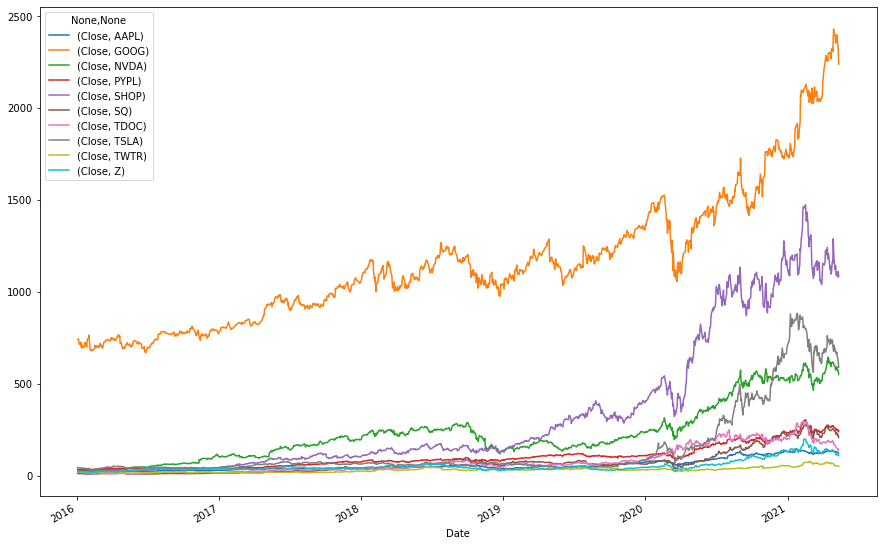

In [12]:
df[['Close']].plot(figsize = (15,10))

In [13]:
closing_df = df[['Close']]

<AxesSubplot:xlabel='Date'>

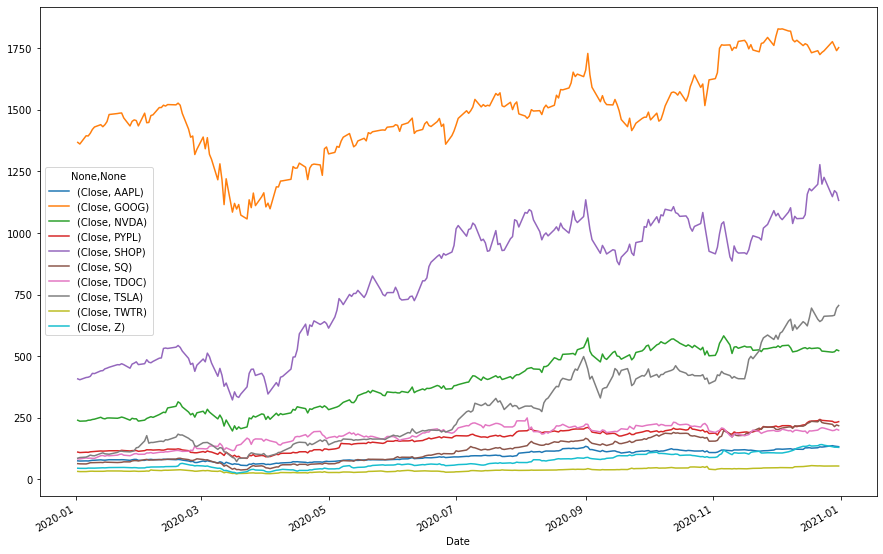

In [14]:
closing_df.loc['2020'].plot(figsize = (15,10))

In [15]:
closing_df.head(10)

Close                                                      \
                 AAPL        GOOG       NVDA       PYPL       SHOP     SQ   
Date                                                                        
2016-01-04  26.337500  741.840027  32.369999  34.750000  25.719999  12.16   
2016-01-05  25.677500  742.580017  32.889999  34.310001  25.309999  11.51   
2016-01-06  25.174999  743.619995  31.530001  33.980000  25.299999  11.52   
2016-01-07  24.112499  726.390015  30.280001  33.130001  24.670000  11.16   
2016-01-08  24.240000  714.469971  29.629999  32.689999  24.930000  11.31   
2016-01-11  24.632500  716.030029  29.680000  33.040001  23.870001  11.84   
2016-01-12  24.990000  726.070007  30.180000  33.080002  23.740000  12.09   
2016-01-13  24.347500  700.559998  29.260000  32.119999  21.379999  11.61   
2016-01-14  24.879999  714.719971  28.670000  32.869999  20.639999  10.82   
2016-01-15  24.282499  694.450012  27.110001  32.310001  19.889999  10.27   

                                                        
                 TDOC       TSLA       TWTR          Z  
Date                                                    
2016-01-04  17.990000  44.681999  22.559999  22.110001  
2016-01-05  19.500000  44.686001  21.920000  21.990000  
2016-01-06  20.660000  43.807999  21.389999  21.959999  
2016-01-07  20.180000  43.130001  20.260000  21.500000  
2016-01-08  19.170000  42.200001  19.980000  22.100000  
2016-01-11  19.000000  41.570000  19.650000  22.160000  
2016-01-12  18.629999  41.993999  19.620001  22.340000  
2016-01-13  16.910000  40.062000  18.680000  21.450001  
2016-01-14  17.730000  41.236000  19.000000  20.770000  
2016-01-15  17.020000  40.998001  17.940001  20.830000

In [16]:
closing_df.columns = ["SQ", "TSLA", "AAPL", "GOOG", "PYPL", "SHOP", "TDOC", "NVDA", "TWTR", "Z"]

In [17]:
closing_df.head()

,SQ,TSLA,AAPL,GOOG,PYPL,SHOP,TDOC,NVDA,TWTR,Z
Date,,,,,,,,,,
2016-01-04,26.337500,741.840027,32.369999,34.750000,25.719999,12.16,17.99,44.681999,22.559999,22.110001
2016-01-05,25.677500,742.580017,32.889999,34.310001,25.309999,11.51,19.50,44.686001,21.920000,21.990000
2016-01-06,25.174999,743.619995,31.530001,33.980000,25.299999,11.52,20.66,43.807999,21.389999,21.959999
2016-01-07,24.112499,726.390015,30.280001,33.130001,24.670000,11.16,20.18,43.130001,20.260000,21.500000
2016-01-08,24.240000,714.469971,29.629999,32.689999,24.930000,11.31,19.17,42.200001,19.980000,22.100000


In [18]:
closing_df.columns = pd.MultiIndex.from_tuples(
    zip(closing_df.columns, ['close','close', 'close','close', 'close','close', 'close','close', 'close','close']
        ))

closing_df.head()

,SQ,TSLA,AAPL,GOOG,PYPL,SHOP,TDOC,NVDA,TWTR,Z
,close,close,close,close,close,close,close,close,close,close
Date,,,,,,,,,,
2016-01-04,26.337500,741.840027,32.369999,34.750000,25.719999,12.16,17.99,44.681999,22.559999,22.110001
2016-01-05,25.677500,742.580017,32.889999,34.310001,25.309999,11.51,19.50,44.686001,21.920000,21.990000
2016-01-06,25.174999,743.619995,31.530001,33.980000,25.299999,11.52,20.66,43.807999,21.389999,21.959999
2016-01-07,24.112499,726.390015,30.280001,33.130001,24.670000,11.16,20.18,43.130001,20.260000,21.500000
2016-01-08,24.240000,714.469971,29.629999,32.689999,24.930000,11.31,19.17,42.200001,19.980000,22.100000


In [19]:
closing_df.tail()

,SQ,TSLA,AAPL,GOOG,PYPL,SHOP,TDOC,NVDA,TWTR,Z
,close,close,close,close,close,close,close,close,close,close
Date,,,,,,,,,,
2021-05-06,129.740005,2381.350098,580.919983,252.020004,1090.930054,223.960007,151.899994,663.539978,53.810001,113.750000
2021-05-07,130.210007,2398.689941,592.489990,253.360001,1108.599976,233.350006,151.039993,672.369995,53.790001,118.544998
2021-05-10,126.849998,2341.659912,570.630005,243.630005,1080.239990,216.429993,141.050003,629.039978,51.810001,112.470001
2021-05-11,125.910004,2308.760010,572.250000,248.600006,1110.199951,220.649994,145.789993,617.200012,52.880001,114.779999
2021-05-12,122.769997,2239.080078,550.340027,239.910004,1083.900024,206.669998,140.080002,589.890015,50.700001,108.720001


In [20]:
closing_df.iloc[-1,0]

122.7699966430664

In [21]:
closing_df.shape

(1349, 10)

In [22]:
closing_df.columns = ["SQ", "TSLA", "AAPL", "FB", "PYPL", "SHOP", "TDOC", "NVDA", "TWTR", "Z"]

In [23]:
closing_df.head(10)

,SQ,TSLA,AAPL,FB,PYPL,SHOP,TDOC,NVDA,TWTR,Z
Date,,,,,,,,,,
2016-01-04,26.337500,741.840027,32.369999,34.750000,25.719999,12.16,17.990000,44.681999,22.559999,22.110001
2016-01-05,25.677500,742.580017,32.889999,34.310001,25.309999,11.51,19.500000,44.686001,21.920000,21.990000
2016-01-06,25.174999,743.619995,31.530001,33.980000,25.299999,11.52,20.660000,43.807999,21.389999,21.959999
2016-01-07,24.112499,726.390015,30.280001,33.130001,24.670000,11.16,20.180000,43.130001,20.260000,21.500000
2016-01-08,24.240000,714.469971,29.629999,32.689999,24.930000,11.31,19.170000,42.200001,19.980000,22.100000
2016-01-11,24.632500,716.030029,29.680000,33.040001,23.870001,11.84,19.000000,41.570000,19.650000,22.160000
2016-01-12,24.990000,726.070007,30.180000,33.080002,23.740000,12.09,18.629999,41.993999,19.620001,22.340000
2016-01-13,24.347500,700.559998,29.260000,32.119999,21.379999,11.61,16.910000,40.062000,18.680000,21.450001
2016-01-14,24.879999,714.719971,28.670000,32.869999,20.639999,10.82,17.730000,41.236000,19.000000,20.770000


In [25]:
#Amount of shares are calculated based on the closing price of each stock on January 4, 2016
#Each stock has $10,000 worth

#AAPL closing price = $24.36
#FB closing price = $102.22
#NVDA closing price = $31.66
#PYPL closing price = $34.75
#SHOP closing price = $25.72
#SQ closing price = $12.16
#TDOC closing price = $17.99
#TSLA closing price = $44.68
#TWTR closing price = $22.56
#Z closing price = $22.11

aapl_shares = 411
fb_shares = 98
nvda_shares = 316
pypl_shares = 288
shop_shares = 389
sq_shares = 823
tdoc_shares = 556
tsla_shares = 224
twtr_shares = 444
z_shares = 453


In [26]:
my_portfolio = pd.DataFrame(index = ["SQ", "TSLA", "AAPL", "FB", "PYPL", "SHOP", "TDOC", "NVDA", "TWTR", "Z"], columns = ["Acquisition Date", "Quantity", "Unit Cost", "Date", "Closing Price"])



In [27]:
my_portfolio

,Acquisition Date,Quantity,Unit Cost,Date,Closing Price
SQ,NaN,NaN,NaN,NaN,NaN
TSLA,NaN,NaN,NaN,NaN,NaN
AAPL,NaN,NaN,NaN,NaN,NaN
FB,NaN,NaN,NaN,NaN,NaN
PYPL,NaN,NaN,NaN,NaN,NaN
SHOP,NaN,NaN,NaN,NaN,NaN
TDOC,NaN,NaN,NaN,NaN,NaN
NVDA,NaN,NaN,NaN,NaN,NaN
TWTR,NaN,NaN,NaN,NaN,NaN
Z,NaN,NaN,NaN,NaN,NaN


In [28]:
dates = ['2016-01-04', '2016-01-04', '2016-01-04', '2016-01-04', '2016-01-04', '2016-01-04', '2016-01-04', '2016-01-04', '2016-01-04', '2016-01-04']

my_portfolio['Acquisition Date'] = dates

In [29]:
quantity = [411, 98, 316, 288, 389, 823, 556, 224, 444, 453]

In [30]:
my_portfolio['Quantity'] = quantity

In [31]:
cost = [24.36, 102.22, 31.66, 34.75, 25.72, 12.16, 17.99, 44.68, 22.56, 22.11]

my_portfolio['Unit Cost'] = cost

In [32]:
my_portfolio['Cost Basis'] = my_portfolio['Quantity'] * my_portfolio['Unit Cost']

my_portfolio

,Acquisition Date,Quantity,Unit Cost,Date,Closing Price,Cost Basis
SQ,2016-01-04,411,24.36,NaN,NaN,10011.96
TSLA,2016-01-04,98,102.22,NaN,NaN,10017.56
AAPL,2016-01-04,316,31.66,NaN,NaN,10004.56
FB,2016-01-04,288,34.75,NaN,NaN,10008.00
PYPL,2016-01-04,389,25.72,NaN,NaN,10005.08
SHOP,2016-01-04,823,12.16,NaN,NaN,10007.68
TDOC,2016-01-04,556,17.99,NaN,NaN,10002.44
NVDA,2016-01-04,224,44.68,NaN,NaN,10008.32
TWTR,2016-01-04,444,22.56,NaN,NaN,10016.64
Z,2016-01-04,453,22.11,NaN,NaN,10015.83


In [33]:
my_portfolio = my_portfolio[['Acquisition Date', 'Quantity', 'Unit Cost', 'Cost Basis', 'Date', 'Closing Price']]

In [34]:
my_portfolio.drop(columns = 'Date', inplace = True)

/Users/charlesmitchell/opt/anaconda3/envs/mynewenv/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
my_portfolio

,Acquisition Date,Quantity,Unit Cost,Cost Basis,Closing Price
SQ,2016-01-04,411,24.36,10011.96,NaN
TSLA,2016-01-04,98,102.22,10017.56,NaN
AAPL,2016-01-04,316,31.66,10004.56,NaN
FB,2016-01-04,288,34.75,10008.00,NaN
PYPL,2016-01-04,389,25.72,10005.08,NaN
SHOP,2016-01-04,823,12.16,10007.68,NaN
TDOC,2016-01-04,556,17.99,10002.44,NaN
NVDA,2016-01-04,224,44.68,10008.32,NaN
TWTR,2016-01-04,444,22.56,10016.64,NaN
Z,2016-01-04,453,22.11,10015.83,NaN


In [36]:
prices = [closing_df.iloc[-1,0], closing_df.iloc[-1,1], closing_df.iloc[-1,2], closing_df.iloc[-1,3], closing_df.iloc[-1,4], closing_df.iloc[-1,5], closing_df.iloc[-1,6], closing_df.iloc[-1,7], closing_df.iloc[-1,8], closing_df.iloc[-1,9]]

my_portfolio['Closing Price'] = prices

<ipython-input-36-df202265434b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_portfolio['Closing Price'] = prices


In [37]:
my_portfolio.columns = ['Acquisition Date', 'Quantity', 'Unit Cost', 'Cost Basis', 'Current Closing Price']

In [38]:
my_portfolio['Ticker Return'] = (my_portfolio['Current Closing Price'] / my_portfolio['Unit Cost']) - 1

my_portfolio

,Acquisition Date,Quantity,Unit Cost,Cost Basis,Current Closing Price,Ticker Return
SQ,2016-01-04,411,24.36,10011.96,122.769997,4.039819
TSLA,2016-01-04,98,102.22,10017.56,2239.080078,20.904520
AAPL,2016-01-04,316,31.66,10004.56,550.340027,16.382818
FB,2016-01-04,288,34.75,10008.00,239.910004,5.903885
PYPL,2016-01-04,389,25.72,10005.08,1083.900024,41.142303
SHOP,2016-01-04,823,12.16,10007.68,206.669998,15.995888
TDOC,2016-01-04,556,17.99,10002.44,140.080002,6.786548
NVDA,2016-01-04,224,44.68,10008.32,589.890015,12.202552
TWTR,2016-01-04,444,22.56,10016.64,50.700001,1.247340
Z,2016-01-04,453,22.11,10015.83,108.720001,3.917232


In [55]:
tickers_2 = ["SQ", "TSLA", "AAPL", "GOOG", "PYPL", "SHOP", "TDOC", "NVDA", "TWTR", "Z"]

start_2 = '2016-01-01'
end_2 = '2021-05-15'

In [56]:
df_2 = pdr.data.get_data_yahoo(tickers_2, start_2, end_2)

[*********************100%***********************]  10 of 10 completed


In [57]:
df_2.head(10)

Adj Close                                                      \
                 AAPL        GOOG       NVDA       PYPL       SHOP     SQ   
Date                                                                        
2016-01-04  24.323219  741.840027  31.661398  34.750000  25.719999  12.16   
2016-01-05  23.713696  742.580017  32.170021  34.310001  25.309999  11.51   
2016-01-06  23.249626  743.619995  30.839788  33.980000  25.299999  11.52   
2016-01-07  22.268383  726.390015  29.617151  33.130001  24.670000  11.16   
2016-01-08  22.386133  714.469971  28.981380  32.689999  24.930000  11.31   
2016-01-11  22.748621  716.030029  29.030289  33.040001  23.870001  11.84   
2016-01-12  23.078775  726.070007  29.519341  33.080002  23.740000  12.09   
2016-01-13  22.485413  700.559998  28.619478  32.119999  21.379999  11.61   
2016-01-14  22.977186  714.719971  28.042391  32.869999  20.639999  10.82   
2016-01-15  22.425385  694.450012  26.516548  32.310001  19.889999  10.27   

                                                        ...     Volume  \
                 TDOC       TSLA       TWTR          Z  ...       AAPL   
Date                                                    ...              
2016-01-04  17.990000  44.681999  22.559999  22.110001  ...  270597600   
2016-01-05  19.500000  44.686001  21.920000  21.990000  ...  223164000   
2016-01-06  20.660000  43.807999  21.389999  21.959999  ...  273829600   
2016-01-07  20.180000  43.130001  20.260000  21.500000  ...  324377600   
2016-01-08  19.170000  42.200001  19.980000  22.100000  ...  283192000   
2016-01-11  19.000000  41.570000  19.650000  22.160000  ...  198957600   
2016-01-12  18.629999  41.993999  19.620001  22.340000  ...  196616800   
2016-01-13  16.910000  40.062000  18.680000  21.450001  ...  249758400   
2016-01-14  17.730000  41.236000  19.000000  20.770000  ...  252680400   
2016-01-15  17.020000  40.998001  17.940001  20.830000  ...  319335600   

                                                                            \
               GOOG      NVDA      PYPL    SHOP       SQ    TDOC      TSLA   
Date                                                                         
2016-01-04  3272800   8951900  12287700  601800  2751500  186100  34135500   
2016-01-05  1950700  12256800  11227700  418200  2352800  373300  15934000   
2016-01-06  1947000  11233600   8441300  256600  1850600  509600  18895500   
2016-01-07  2963700  16132600  11041100  416000  1636000  277400  17771500   
2016-01-08  2450900   9961800   7848800  137400   587300  192700  18140500   
2016-01-11  2090600  10234300   8937400  294500  1676900  191400  20457000   
2016-01-12  2024500  11733900   7854000  369800  2136100  262000  15459500   
2016-01-13  2501700  12041800   8069400  510500  2095200  474000  20632000   
2016-01-14  2225800  15005900   7749500  813700  1604900  304400  32453500   
2016-01-15  3608100  21036300  12174400  921200  1203700  200400  27893000   

                               
                TWTR        Z  
Date                           
2016-01-04  15325000  1504400  
2016-01-05  17077700  1252600  
2016-01-06  14033600  1089100  
2016-01-07  20759800  1178900  
2016-01-08  21832300  1056500  
2016-01-11  21342100  1214600  
2016-01-12  14601300  1226000  
2016-01-13  35876000  2379400  
2016-01-14  37117100  2615800  
2016-01-15  24600000  3363000  

[10 rows x 60 columns]

In [58]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1351 entries, 2016-01-04 to 2021-05-14
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  1351 non-null   float64
 1   (Adj Close, GOOG)  1351 non-null   float64
 2   (Adj Close, NVDA)  1351 non-null   float64
 3   (Adj Close, PYPL)  1351 non-null   float64
 4   (Adj Close, SHOP)  1351 non-null   float64
 5   (Adj Close, SQ)    1351 non-null   float64
 6   (Adj Close, TDOC)  1351 non-null   float64
 7   (Adj Close, TSLA)  1351 non-null   float64
 8   (Adj Close, TWTR)  1351 non-null   float64
 9   (Adj Close, Z)     1351 non-null   float64
 10  (Close, AAPL)      1351 non-null   float64
 11  (Close, GOOG)      1351 non-null   float64
 12  (Close, NVDA)      1351 non-null   float64
 13  (Close, PYPL)      1351 non-null   float64
 14  (Close, SHOP)      1351 non-null   float64
 15  (Close, SQ)        1351 non-null   float64
 16  (Close

In [59]:
analysis_portfolio = df_2.Close

In [60]:
analysis_portfolio.tail()

,AAPL,GOOG,NVDA,PYPL,SHOP,SQ,TDOC,TSLA,TWTR,Z
Date,,,,,,,,,,
2021-05-10,126.849998,2341.659912,570.630005,243.630005,1080.239990,216.429993,141.050003,629.039978,51.810001,112.470001
2021-05-11,125.910004,2308.760010,572.250000,248.600006,1110.199951,220.649994,145.789993,617.200012,52.880001,114.779999
2021-05-12,122.769997,2239.080078,550.340027,239.910004,1083.900024,206.669998,140.080002,589.890015,50.700001,108.720001
2021-05-13,124.970001,2261.969971,546.609985,240.800003,1047.770020,197.130005,132.710007,571.690002,50.110001,107.099998
2021-05-14,127.449997,2316.159912,569.719971,246.289993,1085.010010,207.850006,139.679993,589.739990,51.730000,111.879997


In [62]:
analysis_portfolio.columns = ["AAPL", "FB", "NVDA", "PYPL", "SHOP", "SQ", "TDOC", "TSLA", "TWTR", "Z"]

analysis_portfolio

,AAPL,FB,NVDA,PYPL,SHOP,SQ,TDOC,TSLA,TWTR,Z
Date,,,,,,,,,,
2016-01-04,26.337500,741.840027,32.369999,34.750000,25.719999,12.160000,17.990000,44.681999,22.559999,22.110001
2016-01-05,25.677500,742.580017,32.889999,34.310001,25.309999,11.510000,19.500000,44.686001,21.920000,21.990000
2016-01-06,25.174999,743.619995,31.530001,33.980000,25.299999,11.520000,20.660000,43.807999,21.389999,21.959999
2016-01-07,24.112499,726.390015,30.280001,33.130001,24.670000,11.160000,20.180000,43.130001,20.260000,21.500000
2016-01-08,24.240000,714.469971,29.629999,32.689999,24.930000,11.310000,19.170000,42.200001,19.980000,22.100000
...,...,...,...,...,...,...,...,...,...,...
2021-05-10,126.849998,2341.659912,570.630005,243.630005,1080.239990,216.429993,141.050003,629.039978,51.810001,112.470001
2021-05-11,125.910004,2308.760010,572.250000,248.600006,1110.199951,220.649994,145.789993,617.200012,52.880001,114.779999
2021-05-12,122.769997,2239.080078,550.340027,239.910004,1083.900024,206.669998,140.080002,589.890015,50.700001,108.720001


In [63]:
analysis_portfolio_returns = analysis_portfolio.pct_change().dropna()

analysis_portfolio_returns

,AAPL,FB,NVDA,PYPL,SHOP,SQ,TDOC,TSLA,TWTR,Z
Date,,,,,,,,,,
2016-01-05,-0.025059,0.000998,0.016064,-0.012662,-0.015941,-0.053454,0.083936,0.000090,-0.028369,-0.005427
2016-01-06,-0.019570,0.001400,-0.041350,-0.009618,-0.000395,0.000869,0.059487,-0.019648,-0.024179,-0.001364
2016-01-07,-0.042205,-0.023170,-0.039645,-0.025015,-0.024901,-0.031250,-0.023233,-0.015477,-0.052828,-0.020947
2016-01-08,0.005288,-0.016410,-0.021466,-0.013281,0.010539,0.013441,-0.050050,-0.021563,-0.013820,0.027907
2016-01-11,0.016192,0.002184,0.001688,0.010707,-0.042519,0.046861,-0.008868,-0.014929,-0.016517,0.002715
...,...,...,...,...,...,...,...,...,...,...
2021-05-10,-0.025805,-0.023775,-0.036895,-0.038404,-0.025582,-0.072509,-0.066141,-0.064444,-0.036810,-0.051246
2021-05-11,-0.007410,-0.014050,0.002839,0.020400,0.027735,0.019498,0.033605,-0.018822,0.020652,0.020539
2021-05-12,-0.024939,-0.030181,-0.038287,-0.034956,-0.023689,-0.063358,-0.039166,-0.044248,-0.041225,-0.052797


<AxesSubplot:xlabel='Date'>

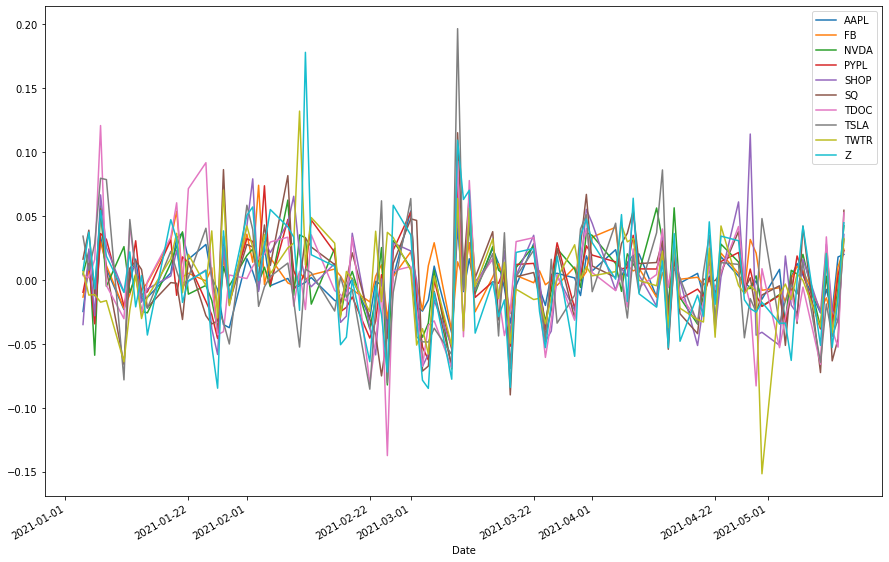

In [64]:
analysis_portfolio_returns.loc['2021'].plot(figsize = (15,10))

<AxesSubplot:title={'center':'Cumulative Portfolio Returns'}, xlabel='Date'>

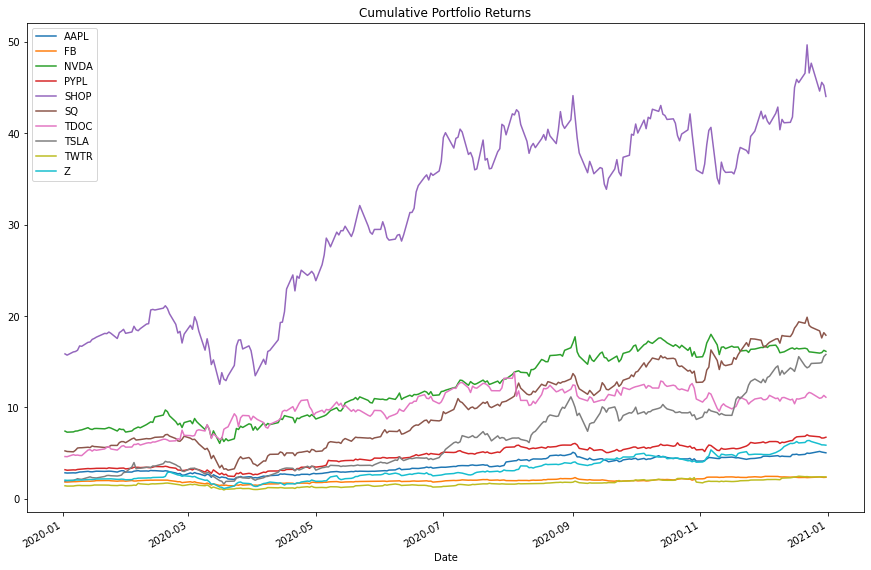

In [65]:
cumulative_returns = (1 + analysis_portfolio_returns).cumprod()

cumulative_returns.loc['2020'].plot(title = 'Cumulative Portfolio Returns', figsize = (15,10))

In [66]:
cumulative_returns.tail(10)

,AAPL,FB,NVDA,PYPL,SHOP,SQ,TDOC,TSLA,TWTR,Z
Date,,,,,,,,,,
2021-05-03,5.032368,3.228688,18.333951,7.455827,43.624030,20.039473,9.072263,15.328321,2.419326,5.685210
2021-05-04,4.854295,3.173528,17.734013,7.198849,44.437791,19.012336,8.803224,15.075422,2.411348,5.492989
2021-05-05,4.863788,3.176884,17.866545,7.119424,43.559487,19.068256,8.726515,15.015890,2.374114,5.146992
2021-05-06,4.926056,3.210059,17.946247,7.252374,42.415633,18.417764,8.443580,14.850275,2.385195,5.144731
2021-05-07,4.943902,3.233433,18.303677,7.290935,43.102644,19.189968,8.395775,15.047894,2.384309,5.361601
2021-05-10,4.816327,3.156556,17.628360,7.010935,42.000001,17.798519,7.840467,14.078152,2.296543,5.086838
2021-05-11,4.780636,3.112207,17.678407,7.153957,43.164852,18.145559,8.103946,13.813169,2.343972,5.191316
2021-05-12,4.661414,3.018279,17.001546,6.903885,42.142304,16.995888,7.786548,13.201961,2.247341,4.917232
2021-05-13,4.744946,3.049134,16.886315,6.929496,40.737560,16.211349,7.376877,12.794638,2.221188,4.843962


<AxesSubplot:title={'center':'Cumulative Portfolio Returns'}, xlabel='Date'>

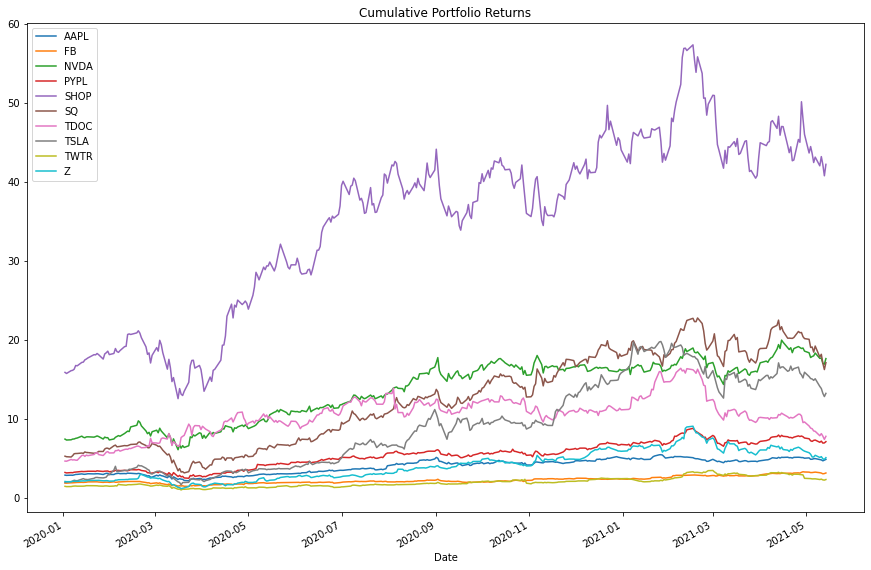

In [67]:
cumulative_returns.loc['2020':].plot(title = 'Cumulative Portfolio Returns', figsize = (15,10))

In [68]:
volatility = analysis_portfolio_returns.std()
volatility.sort_values(inplace=True, ascending=False)
volatility

TSLA    0.036843
TDOC    0.036402
SQ      0.034421
Z       0.033911
TWTR    0.033733
SHOP    0.032769
NVDA    0.029867
PYPL    0.021958
AAPL    0.019040
FB      0.016756
dtype: float64

In [69]:
analysis_portfolio_returns.head()

,AAPL,FB,NVDA,PYPL,SHOP,SQ,TDOC,TSLA,TWTR,Z
Date,,,,,,,,,,
2016-01-05,-0.025059,0.000998,0.016064,-0.012662,-0.015941,-0.053454,0.083936,0.000090,-0.028369,-0.005427
2016-01-06,-0.019570,0.001400,-0.041350,-0.009618,-0.000395,0.000869,0.059487,-0.019648,-0.024179,-0.001364
2016-01-07,-0.042205,-0.023170,-0.039645,-0.025015,-0.024901,-0.031250,-0.023233,-0.015477,-0.052828,-0.020947
2016-01-08,0.005288,-0.016410,-0.021466,-0.013281,0.010539,0.013441,-0.050050,-0.021563,-0.013820,0.027907
2016-01-11,0.016192,0.002184,0.001688,0.010707,-0.042519,0.046861,-0.008868,-0.014929,-0.016517,0.002715


In [70]:
# Set weights
weights = [0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10]


# Calculate portfolio return
weighted_portfolio_returns = analysis_portfolio_returns.dot(weights)


# Display sample data
weighted_portfolio_returns.head(10)


Date
2016-01-05   -0.003983
2016-01-06   -0.005437
2016-01-07   -0.029867
2016-01-08   -0.007942
2016-01-11   -0.000249
2016-01-12    0.005958
2016-01-13   -0.048554
2016-01-14    0.000584
2016-01-15   -0.030971
2016-01-19   -0.014843
dtype: float64

In [71]:
weighted_portfolio_returns.tail()

Date
2021-05-10   -0.044161
2021-05-11    0.010499
2021-05-12   -0.039285
2021-05-13   -0.016442
2021-05-14    0.035986
dtype: float64

<AxesSubplot:xlabel='Date'>

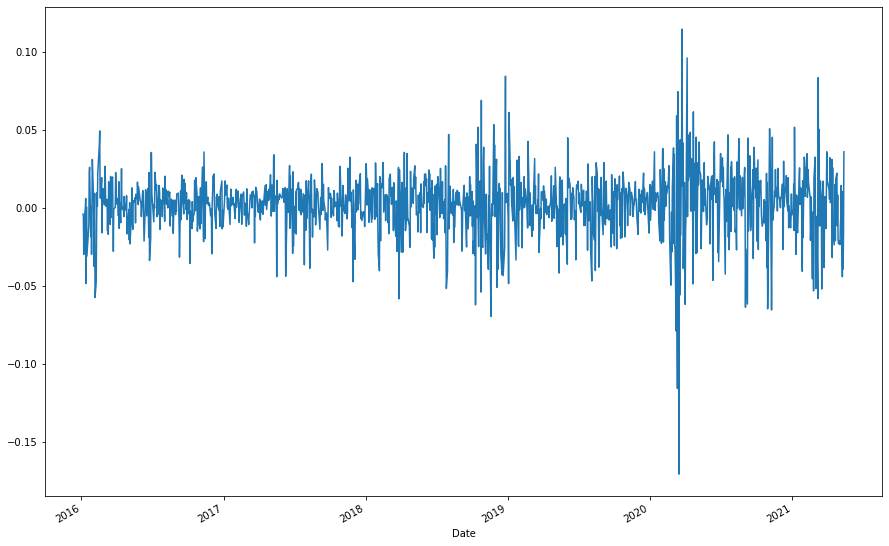

In [73]:
weighted_portfolio_returns.plot(figsize = (15,10))

In [76]:
cumulative_returns

,AAPL,FB,NVDA,PYPL,SHOP,SQ,TDOC,TSLA,TWTR,Z
Date,,,,,,,,,,
2016-01-05,0.974941,1.000998,1.016064,0.987338,0.984059,0.946546,1.083936,1.000090,0.971631,0.994573
2016-01-06,0.955861,1.002399,0.974050,0.977842,0.983670,0.947368,1.148416,0.980440,0.948138,0.993216
2016-01-07,0.915520,0.979173,0.935434,0.953381,0.959176,0.917763,1.121734,0.965266,0.898050,0.972411
2016-01-08,0.920361,0.963105,0.915354,0.940719,0.969285,0.930099,1.065592,0.944452,0.885638,0.999548
2016-01-11,0.935263,0.965208,0.916898,0.950791,0.928072,0.973684,1.056142,0.930352,0.871011,1.002261
...,...,...,...,...,...,...,...,...,...,...
2021-05-10,4.816327,3.156556,17.628360,7.010935,42.000001,17.798519,7.840467,14.078152,2.296543,5.086838
2021-05-11,4.780636,3.112207,17.678407,7.153957,43.164852,18.145559,8.103946,13.813169,2.343972,5.191316
2021-05-12,4.661414,3.018279,17.001546,6.903885,42.142304,16.995888,7.786548,13.201961,2.247341,4.917232


In [74]:
cumulative_weighted_returns = (1 + weighted_portfolio_returns).cumprod()

cumulative_weighted_returns

Date
2016-01-05     0.996017
2016-01-06     0.990602
2016-01-07     0.961016
2016-01-08     0.953384
2016-01-11     0.953147
                ...    
2021-05-10    12.020469
2021-05-11    12.146666
2021-05-12    11.669489
2021-05-13    11.477616
2021-05-14    11.890644
Length: 1350, dtype: float64

<AxesSubplot:xlabel='Date'>

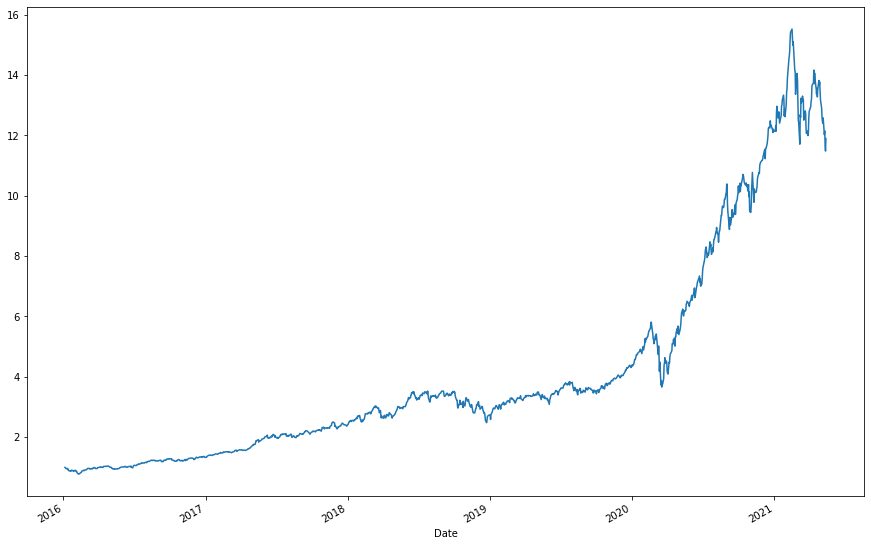

In [75]:
cumulative_weighted_returns.plot(figsize=(15,10))

In [90]:
#Set your Datareader
yf.pdr_override()

#Set your tickers
tickers_3 = ["^DJI", "^GSPC", "^IXIC", '^TNX']

#Set your portfolio dates
start_3 = '2016-01-01'
end_3 = '2021-05-15'

In [91]:
#Load your portfolio Dataframe into a variable
df_3 = pdr.data.get_data_yahoo(tickers_3, start_3, end_3)

[*********************100%***********************]  4 of 4 completed


In [92]:
df_3.head()

Adj Close                                          Close  \
                    ^DJI        ^GSPC        ^IXIC   ^TNX          ^DJI   
Date                                                                      
2016-01-04  17148.939453  2012.660034  4903.089844  2.245  17148.939453   
2016-01-05  17158.660156  2016.709961  4891.430176  2.248  17158.660156   
2016-01-06  16906.509766  1990.260010  4835.759766  2.177  16906.509766   
2016-01-07  16514.099609  1943.089966  4689.430176  2.153  16514.099609   
2016-01-08  16346.450195  1922.030029  4643.629883  2.130  16346.450195   

                                                     High               ...  \
                  ^GSPC        ^IXIC   ^TNX          ^DJI        ^GSPC  ...   
Date                                                                    ...   
2016-01-04  2012.660034  4903.089844  2.245  17405.480469  2038.199951  ...   
2016-01-05  2016.709961  4891.430176  2.248  17195.839844  2021.939941  ...   
2016-01-06  1990.260010  4835.759766  2.177  17154.830078  2011.709961  ...   
2016-01-07  1943.089966  4689.430176  2.153  16888.359375  1985.319946  ...   
2016-01-08  1922.030029  4643.629883  2.130  16651.890625  1960.400024  ...   

                    Low                 Open                                   \
                  ^IXIC   ^TNX          ^DJI        ^GSPC        ^IXIC   ^TNX   
Date                                                                            
2016-01-04  4846.979980  2.200  17405.480469  2038.199951  4897.649902  2.230   
2016-01-05  4872.740234  2.225  17147.500000  2013.780029  4917.839844  2.243   
2016-01-06  4804.689941  2.176  17154.830078  2011.709961  4813.759766  2.191   
2016-01-07  4688.169922  2.153  16888.359375  1985.319946  4736.399902  2.163   
2016-01-08  4637.850098  2.119  16519.169922  1945.969971  4722.020020  2.163   

             Volume                               
               ^DJI       ^GSPC       ^IXIC ^TNX  
Date                                              
2016-01-04  1480600  4304880000  2218420000  0.0  
2016-01-05  1057500  3706620000  1927380000  0.0  
2016-01-06  1202500  4336660000  2168620000  0.0  
2016-01-07  1762400  5076590000  2552590000  0.0  
2016-01-08  1418500  4664940000  2288750000  0.0  

[5 rows x 24 columns]

In [93]:
index_portfolio = df_3[['Adj Close']]

index_portfolio.tail(10)

Adj Close                                  
                    ^DJI        ^GSPC         ^IXIC   ^TNX
Date                                                      
2021-05-03  34113.230469  4192.660156  13895.120117  1.607
2021-05-04  34133.031250  4164.660156  13633.500000  1.592
2021-05-05  34230.339844  4167.589844  13582.419922  1.584
2021-05-06  34548.531250  4201.620117  13632.839844  1.561
2021-05-07  34777.761719  4232.600098  13752.240234  1.577
2021-05-10  34742.820312  4188.430176  13401.860352  1.602
2021-05-11  34269.160156  4152.100098  13389.429688  1.624
2021-05-12  33587.660156  4063.040039  13031.679688  1.695
2021-05-13  34021.449219  4112.500000  13124.990234  1.668
2021-05-14  34382.128906  4173.850098  13429.980469  1.635

In [94]:
index_portfolio.columns = ['DJIA', 'S&P500', 'NASDAQ', '10Yr Yield']

index_portfolio.tail(10)

,DJIA,S&P500,NASDAQ,10Yr Yield
Date,,,,
2021-05-03,34113.230469,4192.660156,13895.120117,1.607
2021-05-04,34133.031250,4164.660156,13633.500000,1.592
2021-05-05,34230.339844,4167.589844,13582.419922,1.584
2021-05-06,34548.531250,4201.620117,13632.839844,1.561
2021-05-07,34777.761719,4232.600098,13752.240234,1.577
2021-05-10,34742.820312,4188.430176,13401.860352,1.602
2021-05-11,34269.160156,4152.100098,13389.429688,1.624
2021-05-12,33587.660156,4063.040039,13031.679688,1.695
2021-05-13,34021.449219,4112.500000,13124.990234,1.668


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

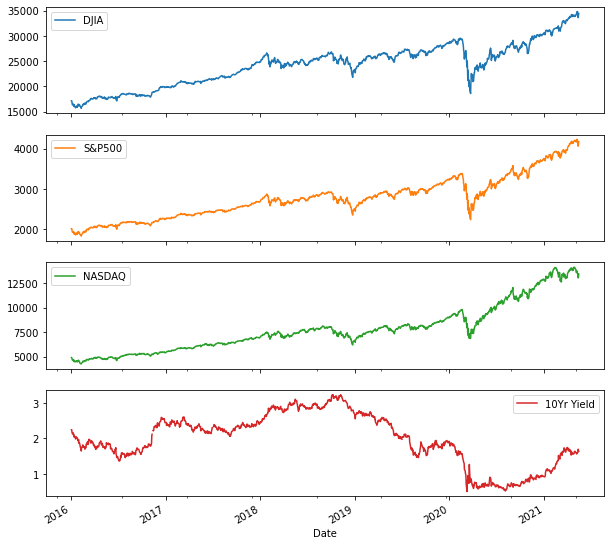

In [105]:
index_portfolio.plot(subplots = True, figsize=(10,10))

In [95]:
index_portfolio_returns = index_portfolio.pct_change().dropna()

index_portfolio_returns.head(10)

,DJIA,S&P500,NASDAQ,10Yr Yield
Date,,,,
2016-01-05,0.000567,0.002012,-0.002378,0.001336
2016-01-06,-0.014695,-0.013115,-0.011381,-0.031584
2016-01-07,-0.023211,-0.023700,-0.030260,-0.011024
2016-01-08,-0.010152,-0.010838,-0.009767,-0.010683
2016-01-11,0.003188,0.000853,-0.001214,0.013145
2016-01-12,0.007174,0.007803,0.010334,-0.025950
2016-01-13,-0.022088,-0.024965,-0.034115,-0.017127
2016-01-14,0.014094,0.016696,0.019651,0.015489
2016-01-15,-0.023870,-0.021599,-0.027428,-0.030982


In [96]:
index_portfolio_returns['Portfolio Returns'] = weighted_portfolio_returns

index_portfolio_returns.head(10)

,DJIA,S&P500,NASDAQ,10Yr Yield,Portfolio Returns
Date,,,,,
2016-01-05,0.000567,0.002012,-0.002378,0.001336,-0.003983
2016-01-06,-0.014695,-0.013115,-0.011381,-0.031584,-0.005437
2016-01-07,-0.023211,-0.023700,-0.030260,-0.011024,-0.029867
2016-01-08,-0.010152,-0.010838,-0.009767,-0.010683,-0.007942
2016-01-11,0.003188,0.000853,-0.001214,0.013145,-0.000249
2016-01-12,0.007174,0.007803,0.010334,-0.025950,0.005958
2016-01-13,-0.022088,-0.024965,-0.034115,-0.017127,-0.048554
2016-01-14,0.014094,0.016696,0.019651,0.015489,0.000584
2016-01-15,-0.023870,-0.021599,-0.027428,-0.030982,-0.030971


<AxesSubplot:xlabel='Date'>

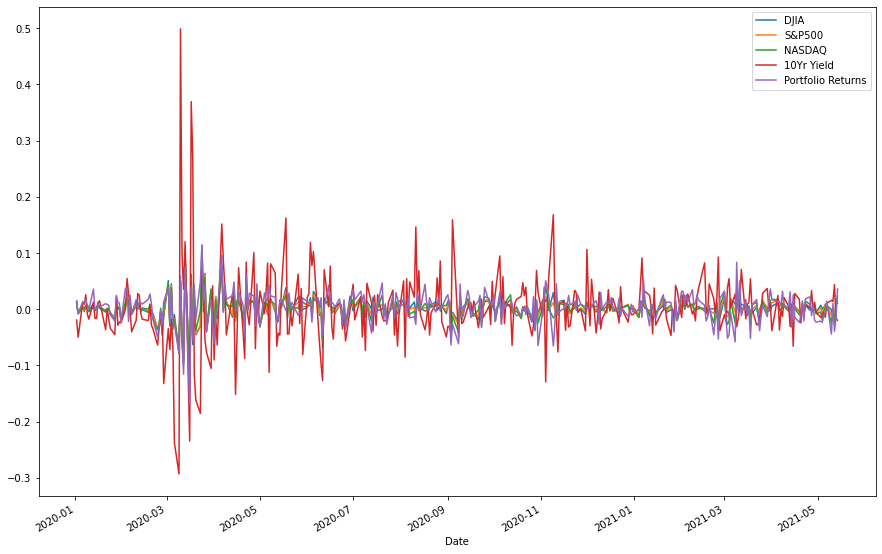

In [99]:
index_portfolio_returns.loc['2020':].plot(figsize=(15,10))

In [97]:
cumulative_weighted_returns = (1 + index_portfolio_returns).cumprod()

cumulative_weighted_returns

,DJIA,S&P500,NASDAQ,10Yr Yield,Portfolio Returns
Date,,,,,
2016-01-05,1.000567,1.002012,0.997622,1.001336,0.996017
2016-01-06,0.985863,0.988870,0.986268,0.969711,0.990602
2016-01-07,0.962981,0.965434,0.956423,0.959020,0.961016
2016-01-08,0.953205,0.954970,0.947082,0.948775,0.953384
2016-01-11,0.956244,0.955785,0.945932,0.961247,0.953147
...,...,...,...,...,...
2021-05-10,2.025946,2.081042,2.733350,0.713586,12.020469
2021-05-11,1.998325,2.062991,2.730815,0.723385,12.146666
2021-05-12,1.958585,2.018741,2.657850,0.755011,11.669489


<AxesSubplot:xlabel='Date'>

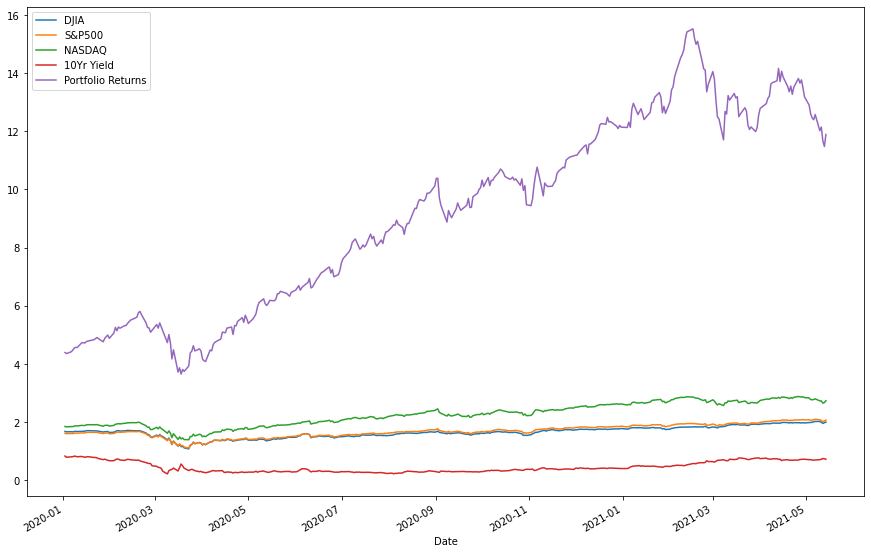

In [100]:
cumulative_weighted_returns.loc['2020':].plot(figsize=(15,10))